<a href="https://colab.research.google.com/github/Rakeshnaidu03/Rakesh-Chanda/blob/main/RakeshChandaICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/My Drive/diabetes(1).csv'

# New Section

In [6]:
# Add more Dense layers to the existing code and check how the accuracy changes
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# load dataset
from sklearn.model_selection import train_test_split
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.1, random_state=30)

np.random.seed(155)

my_first_nn = Sequential()
my_first_nn.add(Dense(55, activation='relu', input_shape=(8,)))
my_first_nn.add(Dense(8, activation='relu'))
my_first_nn.add(Dense(64, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))

my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

loss, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/100
22/22 [==============================] - 2s 5ms/step - loss: 0.2885 - accuracy: 0.6237
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.6425
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.6397
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.6744
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.6816
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2067 - accuracy: 0.6975
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.6903
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2077 - accuracy: 0.6889
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1983 - accuracy: 0.7120
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.7077
Epoch 11/

In [13]:
#Try to change the number of hidden layer and the
#activation to tanh or sigmoid and see what happens.
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2872 - accuracy: 0.9108 - val_loss: 0.1145 - val_accuracy: 0.9646
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0941 - accuracy: 0.9709 - val_loss: 0.1002 - val_accuracy: 0.9684
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0729 - val_accuracy: 0.9789
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0651 - val_accuracy: 0.9816
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0648 - val_accuracy: 

In [16]:
#Run the same code without scaling the images and check the performance
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.4688 - accuracy: 0.8691 - val_loss: 0.1937 - val_accuracy: 0.9447
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1727 - accuracy: 0.9499 - val_loss: 0.1953 - val_accuracy: 0.9391
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1334 - accuracy: 0.9589 - val_loss: 0.1519 - val_accuracy: 0.9534
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1101 - accuracy: 0.9674 - val_loss: 0.1114 - val_accuracy: 0.9680
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1007 - accuracy: 0.9700 - val_loss: 0.1071 - val_accuracy: 0.9674
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0920 - accuracy: 0.9729 - val_loss: 0.1176 - val_accuracy: 0.9666
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.1354 - val_accuracy: 

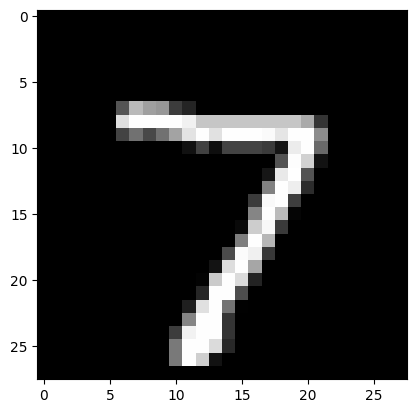

1/1 [==============================] - 0s 58ms/step
Predicted Class: 7


In [17]:
#Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
import matplotlib.pyplot as plt

# Choose an index to plot a test image
index = 0

# Plot the selected test image
plt.imshow(test_images[index], cmap='gray')
plt.show()

# Make a prediction on the selected test image
image = test_data[index].reshape(1, -1)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")
